Contours 처리

In [1]:
import cv2
import matplotlib.pyplot as plt

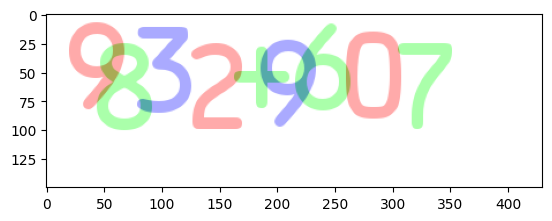

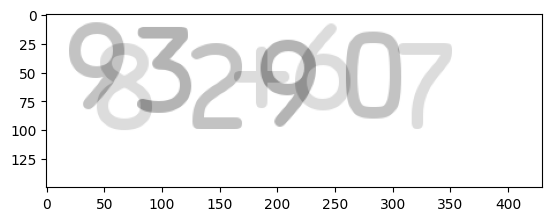

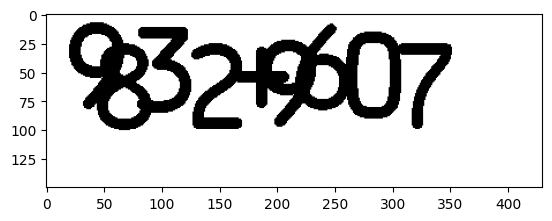

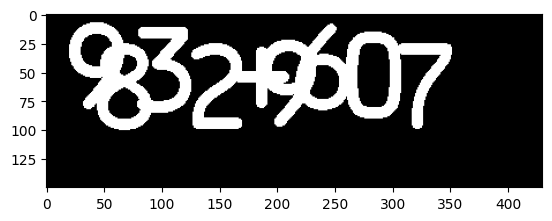

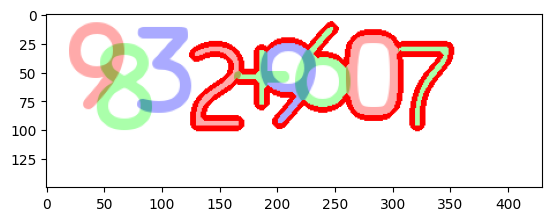

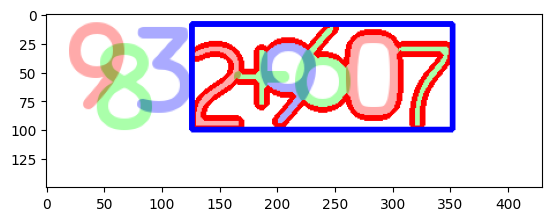

In [36]:
image = cv2.imread('digit_image.png')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show() # 색깔 이미지

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(image_gray, cv2.COLOR_GRAY2RGB))
plt.show() # 흑백 이미지

res, thres = cv2.threshold(image_gray, 230, 255, cv2.THRESH_BINARY) # res에는 230이 들어감

plt.imshow(cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB))
plt.show() # 230 이상만 다 하얀색으로 처리하니 검은 계열인 글자들은 죄다 블랙으로 나타남

thres2 = cv2.bitwise_not(thres) # 흑백 반전 시키기

plt.imshow(cv2.cvtColor(thres2, cv2.COLOR_GRAY2RGB))
plt.show()

contours = cv2.findContours(thres2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0] # findContours는 하얀색을 추출한다 (따라서 글자가 하얀색이도록 만듦)
image2 = cv2.drawContours(image, contours, 0, (0, 0, 255), 3) # -1: 모든 컨투어 보여주기

plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0]
x, y, w, h = cv2.boundingRect(contour) # 첫 번째 컨투어의 사각형 영역의 좌표를 x, y, w, h에 저장
image3 = cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 3)

plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
plt.show()

컨벡스 헐 (Convex Hull) 알고리즘

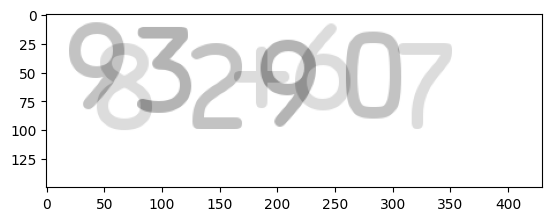

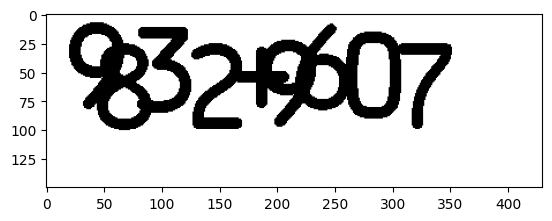

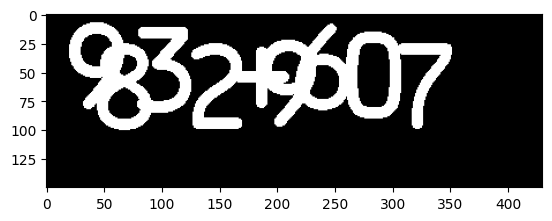

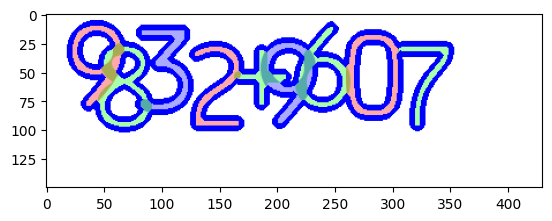

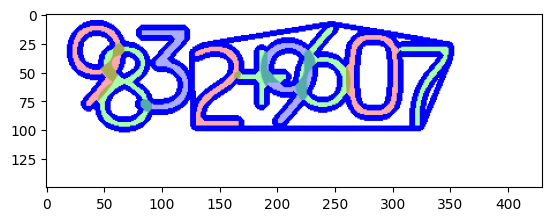

In [50]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('digit_image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(image_gray, cv2.COLOR_GRAY2RGB))
plt.show()

res, thres = cv2.threshold(image_gray, 230, 255, cv2.THRESH_BINARY) # res는 230이 들어감

plt.imshow(cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB))
plt.show()

thres2 = cv2.bitwise_not(thres)

plt.imshow(cv2.cvtColor(thres2, cv2.COLOR_GRAY2RGB))
plt.show()

contours = cv2.findContours(thres2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image2 = cv2.drawContours(image, contours, -1, (255, 0, 0), 3)

plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0]

hull = cv2.convexHull(contour)
image3 = cv2.drawContours(image, [hull], -1, (255, 0, 0), 3)

plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
plt.show()

Contour 근사치 구하기

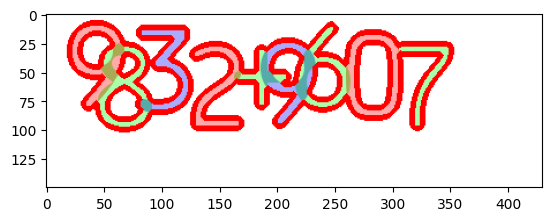

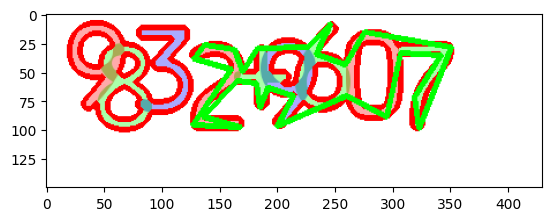

In [58]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('digit_image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

res, thres = cv2.threshold(image_gray, 230, 255, cv2.THRESH_BINARY)
thres2 = cv2.bitwise_not(thres)

contours = cv2.findContours(thres2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image2 = cv2.drawContours(image, contours, -1, (0, 0, 255), 3)

plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0]

epsilon = 0.01 * cv2.arcLength(contour, True) # arcLength: 둘레 길이 (따라서 둘레 길이의 1%만을 둘레로 다시 사용해서 근사치를 그림)
# 입실론 값의 비율을 낮출수록 컨투어와 비슷하게 영역이 그려짐
approx = cv2.approxPolyDP(contour, epsilon, True)
image3 = cv2.drawContours(image, [approx], -1, (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
plt.show()

면적, 둘레, 특징 구하기

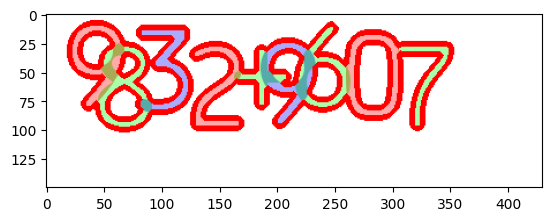

9637.5
1112.1046812534332
{'m00': 9637.5, 'm10': 2328654.1666666665, 'm01': 525860.6666666666, 'm20': 592439950.25, 'm11': 125395340.54166666, 'm02': 32616659.75, 'm30': 157199366984.05002, 'm21': 31597487112.5, 'm12': 7677332730.433333, 'm03': 2223038890.5, 'mu20': 29780523.227014065, 'mu11': -1665373.5978347063, 'mu02': 3923591.96819859, 'mu30': -339915780.7390442, 'mu21': 76375946.41720533, 'mu12': -21905836.49518633, 'mu03': 15169233.760740757, 'nu20': 0.3206295471760697, 'nu11': -0.01793010748946005, 'nu02': 0.04224302932750429, 'nu30': -0.03727866486560947, 'nu21': 0.008376172780476334, 'nu12': -0.0024024196097321344, 'nu03': 0.001663614382378067}


In [61]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('digit_image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

res, thres = cv2.threshold(image_gray, 230, 255, cv2.THRESH_BINARY)
thres2 = cv2.bitwise_not(thres)

contours = cv2.findContours(thres2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image2 = cv2.drawContours(image, contours, -1, (0, 0, 255), 3)

plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0]

area = cv2.contourArea(contour)
print(area) # 면적

length = cv2.arcLength(contour, True)
print(length) # 둘레

moment = cv2.moments(contour)
print(moment) # 특징 (m00: 면적, m10 & m01: 윤곽선 영역 내부의 질량 중심 좌표 등등)